# Qualidade da Energia Elétrica (580562)


## Python 3 - Continuação

Sumário:
- 0 - [Modelagem de distúrbios](#0---Modelagem-de-distúrbios)
- 1 - [Teorema de Amostragem de Nyquist](#1---Teorema-de-Amostragem-de-Nyquist)
- 2 - [Criando uma base de dados de distúrbios sintéticos](#2---Criando-uma-base-de-dados-de-distúrbios-sintéticos)


### 0 - Modelagem de distúrbios

- Sinal senoidal

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

n_periodos = 10 # número de ciclos de sinal
amostras_ciclo = 128 # quantidade de amostras por ciclo de sinal
f = 60 # frequência do sinal em Hz
t = np.linspace(0, n_periodos*(1/f), n_periodos*amostras_ciclo) #np.linspace(início, fim, número de pontos)
print('t_shape:',t.shape)

w=2.0*np.pi*f # frequência angular
seno = np.sin(w*t)
print('seno_shape:',seno.shape)

In [ ]:
# gráfico da função seno criada
fig = plt.figure(dpi=80)
plt.plot(t, seno)
plt.xlabel('t(s)')
plt.ylabel('sin(t)')
plt.title('Função seno')
plt.show()
fig.savefig("seno.jpg", dpi=80)

- Afundamento de tensão

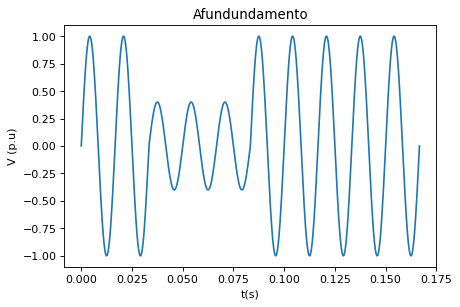

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def u(x):
    a = lambda x: int(x>=0)
    b = list(map(a,x))
    return np.asarray(b)

# parâmetros do sinal fundamental 
n_periodos = 10 
amostras_ciclo = 128 
f = 60

# parâmetros do distúrbio
alpha = 0.6 # aplitude distúrbio = (1-alpha)
t0 = 2*(1/f)
duracao = 3*(1/f)

# sinal fundamental
t = np.linspace(0, n_periodos*(1/f), n_periodos*amostras_ciclo)
w=2.0*np.pi*f
seno = np.sin(w*t)

# distúrbio 
afundundamento = (1-alpha*(u(t-t0)-u(t-(t0+duracao))))*seno

# plotando o distúrbio
fig = plt.figure(dpi=80)
plt.plot(t, afundundamento)
plt.xlabel('t(s)')
plt.ylabel('V (p.u)')
plt.title('Afundundamento')
plt.show()

In [3]:
# função u(t)
vetor = np.array([-1,2,10])
a = lambda x: int(x>=0)
b = list(map(a,vetor))
print(b)

[0, 1, 1]


In [4]:
# exemplo funcionamento função u(t)
u = lambda x: int(x>=0)
t = 15
t0 = 12
duracao = 3
print('u(t-t0): ', u(t-t0))
print('t-(t0+duracao): ', u(t-(t0+duracao)))


u(t-t0):  1
t-(t0+duracao):  1


- Elevação de tensão

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def u(x):
    a = lambda x: int(x>=0)
    b = list(map(a,x))
    return np.asarray(b)


# parâmetros do sinal fundamental 
n_periodos = 10 
amostras_ciclo = 128 
f = 60

# parâmetros do distúrbio
alpha = 0.6 # aplitude distúrbio = (1-alpha)
t0 = 5*(1/f)
duracao = 4*(1/f)

# sinal fundamental
t = np.linspace(0, n_periodos*(1/f), n_periodos*amostras_ciclo)
w = 2.0*np.pi*f
seno = np.sin(w*t)

# distúrbio 
elevacao = (1+alpha*(u(t-t0)-u(t-(t0+duracao))))*seno

# plotando o distúrbio
fig = plt.figure(dpi=80)
plt.plot(t, elevacao)
plt.xlabel('t(s)')
plt.ylabel('V (p.u)')
plt.title('Elevação')
plt.show()

- Flicker

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def u(x):
    a = lambda x: int(x>=0)
    b = list(map(a,x))
    return np.asarray(b)

# parâmetros do sinal fundamental 
n_periodos = 20 
amostras_ciclo = 128 
f = 60

# parâmetros do distúrbio
alpha = 0.5 # aplitude distúrbio = (1-alpha)
freq = 50
t0 = 3.5*(1/f)
duracao = 20*(1/f)

# sinal fundamental
t = np.linspace(0, n_periodos*(1/f), n_periodos*amostras_ciclo)
w = 2.0*np.pi*f
seno = np.sin(w*t)

# distúrbio 
flicker = (1+(alpha*(u(t-t0)-u(t-(t0+duracao)))*np.sin(2*np.pi*freq*t)))*seno

# plotando o distúrbio
fig = plt.figure(dpi=80)
plt.plot(t,flicker)
plt.xlabel('t(s)')
plt.ylabel('V (p.u)')
plt.title('Flicker')
plt.show()

- Distorção Harmônica

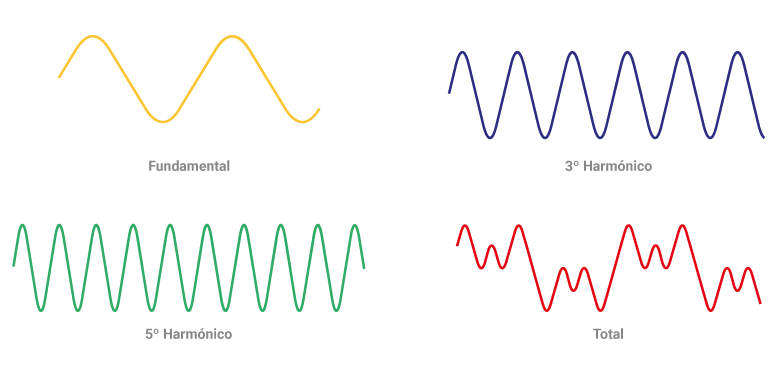

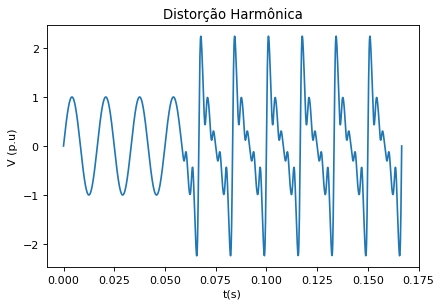

In [5]:
import matplotlib.pyplot as plt
import numpy as np

def u(x):
    a = lambda x: int(x>=0)
    b = list(map(a,x))
    return np.asarray(b)

# parâmetros do sinal fundamental 
n_periodos = 10
amostras_ciclo = 128 
f = 60

# parâmetros do distúrbio
alpha = [5.9964234e-01, 4.9264260e-01, 5.4436305e-01,4.6959989e-01, 
         5.4273133e-02, 4.6726316e-02, 5.3842500e-02, 4.5667522e-02, 5.5508044e-02]
t1 = 3.5/f
duracao = 5/f

# sinal fundamental
t = np.linspace(0, n_periodos*(1/f), n_periodos*amostras_ciclo)
w = 2.0*np.pi*f
seno = np.sin(w*t)

# distúrbio 
a = np.array([0])
harmonics = seno
ordem = 2
for j in range(0,9):
    a = (alpha[j]*np.sin(ordem*w*t))+a
    ordem = ordem+1
a = a*(u(t-t1)-u(t-(t0+duracao)))
harmonics = harmonics+a

# plotando o distúrbio
fig = plt.figure(dpi=80)
plt.plot(t,harmonics)
plt.xlabel('t(s)')
plt.ylabel('V (p.u)')
plt.title('Distorção Harmônica')
plt.show()

### 1 - Teorema de Amostragem de Nyquist

A amostragem é um processo de conversão de um sinal de tempo contínuo num sinal de tempo
discreto. 

A frequência de amostragem é o número de amostras adquiridas por unidade de tempo (minuto, segundo..) do sinal contínuo. Se o período de amostragem é Ts, a frequência de amostragem será fs = 1/Ts.

Se a frequência de amostragem é aumentada, o número de amostras tomadas por minuto também será aumentada.

Segundo o Teoremoa de Amostragem de Nyquist, um sinal pode ser recuperado a partir de uma sequência infinita de amostras, se a taxa de amostragem for pelo menos duas vezes a maior frequência do sinal contínuo.

Matematicamente, temos:
<br><br>
*fs >= 2*f             

Exemplo 1: Considerando um sinal senoidal a uma frequência de 1Hz, é possível caputarar os picos deste sinal se o amostrarmos a 2Hz. 

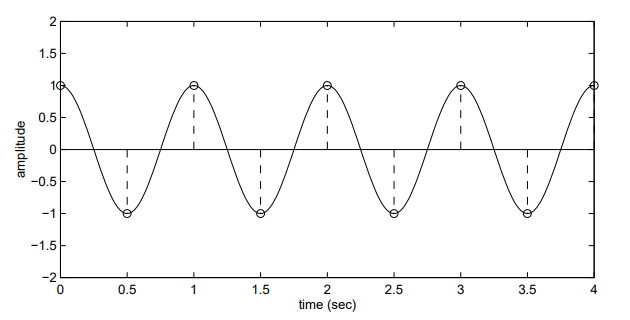

Exemplo 2: Frequância de amostragem igual a 3Hz.

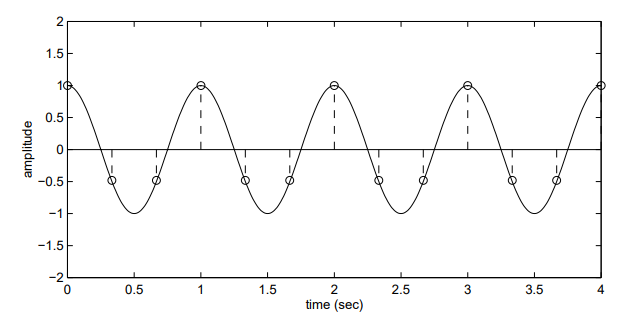

Exemplo 3: Frequância de amostragem igual a 1.5Hz.

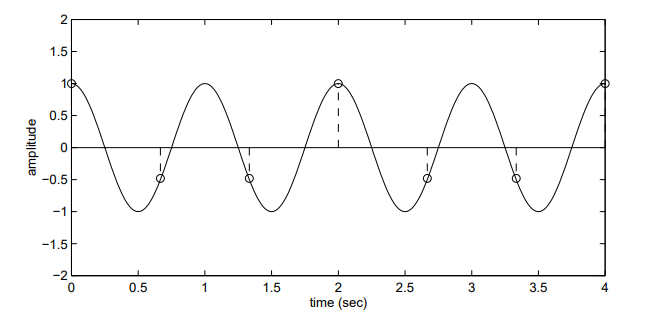

Observe aqui que não estamos apenas perdendo informações, mas estamos obtendo as informações erradas sobre o sinal. A pessoa que recebe essas amostras, sem nenhum prévio conhecimento do sinal original pode ser enganado ao pensar que o sinal tem uma forma bastante diferente:

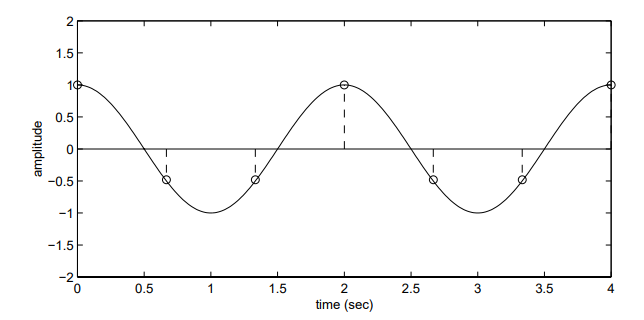

Um sinal senoidal com 128 amostras por ciclo apresenta qual frequência de amostragem?

In [ ]:
amostragem = 128
freq_fund = 60 # Hz

freq_amostragem = amostragem*freq_fund
print(freq_amostragem)

Logo, pelo Teorema de Nyquist, temos que o sinal será aceitavelmente representado se sua componente de maior frequência for menor ou igual a metade de 7680 Hz.

### 2 - Criando uma base de dados de distúrbios sintéticos

In [ ]:
import numpy as np
import pandas as pd

# criando parâmetros aleatórios para gerar 10 distúrbios do tipo flicker
# parâmetros: alpha, freq, t0 e duração

parametros = np.zeros((10,4))

#alpha
parametros[:,0] = np.random.uniform(0.05,0.1,size=(1,10)) 

#freq
parametros[:,1] = np.random.uniform(8,25,size=(1,10))

#t0
parametros[:,2] = np.random.uniform((1/60)/2,1/60,size=(1,10))

#duracao
parametros[:,3] = np.random.uniform(1/60,8/60,size=(1,10))

print(parametros)

save = pd.DataFrame(parametros)
save.to_csv('C:\\Users\\ander\\Desktop\\parametros_flicker.csv',header=None,index=None)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# importando parâmetros

dados = pd.read_csv('C:\\Users\\ander\\Desktop\\parametros_flicker.csv',sep=',',header=None)
parametros = dados.values
print(parametros)

ModuleNotFoundError: No module named 'pandas'

In [ ]:
# gerando os sinais sintéticos

def u(x):
    a = lambda x: int(x>=0)
    b = list(map(a,x))
    return np.asarray(b)

n_periodos = 10
amostras_ciclo = 128 
f = 60

t = np.linspace(0, n_periodos*(1/f), n_periodos*amostras_ciclo)
w = 2.0*np.pi*f
seno = np.sin(w*t)

flicker = np.zeros((len(parametros),n_periodos*amostras_ciclo))

for i in range(len(parametros)):
    flicker[i,:] = (1+(parametros[i,0]*(u(t-parametros[i,2])-u(t-(parametros[i,2]+parametros[i,3])))*np.sin(2*np.pi*parametros[i,1]*t)))*seno



In [ ]:
plt.plot(t,flicker[4,:])
plt.show()

In [ ]:
# Salvando os distúrbios gerados
save = pd.DataFrame(flicker)
save.to_csv('C:\\Users\\ander\\Desktop\\flicker.csv',header=None,index=None)

## Exercício

Implemente os modelos matemáticos dos distúrbios em um único algoritmo (afundamento, elevação, interrupção, transitório oscilatório, transitório impulsivo, flicker, distorção harmônica e notch). Varie aletoriamente os valores dos parâmetros de cada distúrbio, dentro dos limites típicos e crie um banco de dados contendo 100 amostras de cada distúrbio. Salve o banco de dados em um arquivo do formato 'csv'. Utilizar o artigo "Power quality disturbance classification based on compressed sensing and deep convolution neural networks", de autoria de J. Wang, Z. Xu, Y. Che, disponível no IEEE Access, para gerar o distúrbios (modelos + taxa de amostragem).